<a href="https://colab.research.google.com/github/IlyaKv-1/sport/blob/main/%22%D1%81%D0%BF%D0%BE%D1%80%D1%82%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9_%D0%B7%D0%B0%D0%BB_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Разведочный анализ данных и начало машинного обучения



**Цели на буткемп:**

* провести разведочный анализ данных

* построить и проинтерпретировать ML-модель

* обернуть ее в интерактивный веб-сервис

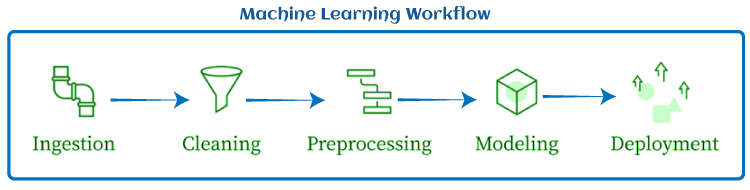

**Цели на сегодня:**

* понять влияние различных факторов (экономических, личных, социальных) на оценки студентов на экзаменах

* научиться делать разведочный анализ данных

* построить первую модель машинного обучения

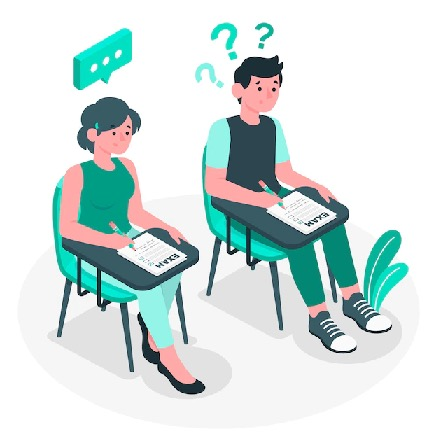

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/IlyaKv-1/sport/refs/heads/main/gym_members_exercise_tracking.csv")

## Описание данных

* Age
* Gender
* Weight (kg)
* Height (m)
* Max_BPM
* Avg_BPM
* Resting_BPM
* Session_Duration (hours)
* Calories_Burned
* Workout_Type
* Fat_Percentage
* Water_Intake (liters)
* Workout_Frequency (days/week)
* Experience_Level
* BMI

In [ ]:
df.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,15.5,2.7,5,3,20.55
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76
7,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,30.6,1.9,3,2,30.57
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,28.9,2.6,4,2,32.34
9,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,29.7,2.7,3,1,30.07


## Исследование данных

Размер датасета

In [ ]:
df.shape

(973, 15)

Информация о типах данных и пропусках

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

Основные числовые характеристики

In [ ]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [ ]:
df.describe(include='object')

,Gender,Workout_Type
count,973,973
unique,2,4
top,Male,Strength
freq,511,258


## Однофакторный анализ

## Age, BMI, Experience_Level

In [ ]:
df[['Age','BMI', 'Experience_Level']].describe()

,Age,BMI,Experience_Level
count,973.000000,973.000000,973.000000
mean,38.683453,24.912127,1.809866
std,12.180928,6.660879,0.739693
min,18.000000,12.320000,1.000000
25%,28.000000,20.110000,1.000000
50%,40.000000,24.160000,2.000000
75%,49.000000,28.560000,2.000000
max,59.000000,49.840000,3.000000


* в оценках есть пропуски

* есть некорректные оценки (меньше 0)

Посмотрим на распределение оценок

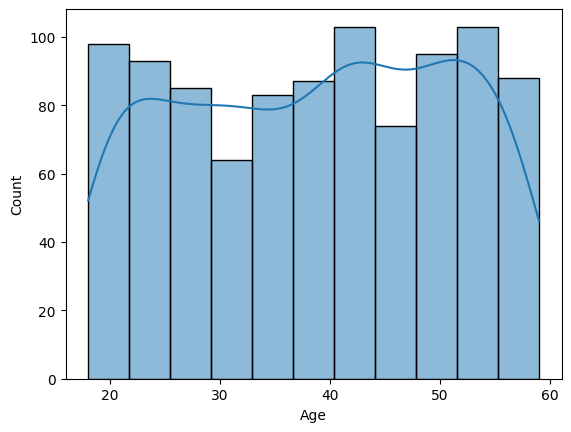

In [ ]:
sns.histplot(df['Age'], kde=True)
plt.show()

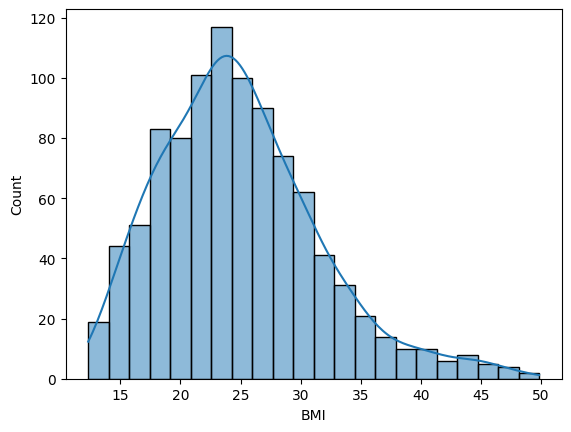

In [ ]:
sns.histplot(df['BMI'], kde=True)
plt.show()

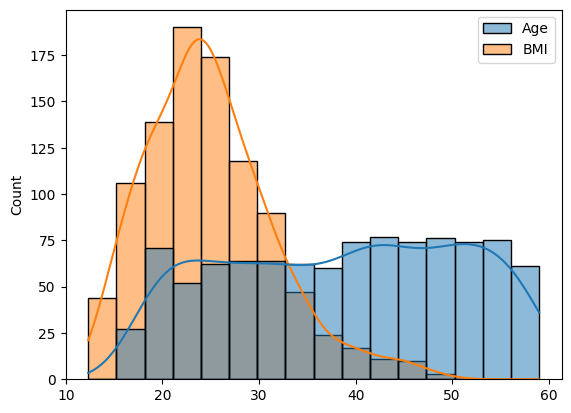

In [ ]:
sns.histplot(df[['Age','BMI']], kde=True)
plt.show()

* заменим отрицательные значения балла на 0

* заменим пропуски на средние значения

In [ ]:
df['math score'] = np.where(df['math score'] < 0, 0, df['math score'])

df['math score'].min()

0.0

In [ ]:
mean = df['math score'].mean()

df['math score'].fillna(mean, inplace=True)

In [ ]:
mean = df['reading score'].mean()

df['reading score'].fillna(mean, inplace=True)

Есть ли связь между баллами студента за разные экзамены?

Построим матрицу корреляций для ответа на этот вопрос.

Коэффициент корреляции $\rho$ - это мера взаимосвязи между двумя величинами (корреляция Пирсона - мера линейной зависимости).

$-1 \leq \rho \leq 1$

Чем больше **по модулю** коэффициент корреляции $\rho$ - тем больше взаимосвязь между величинами.

<Axes: >

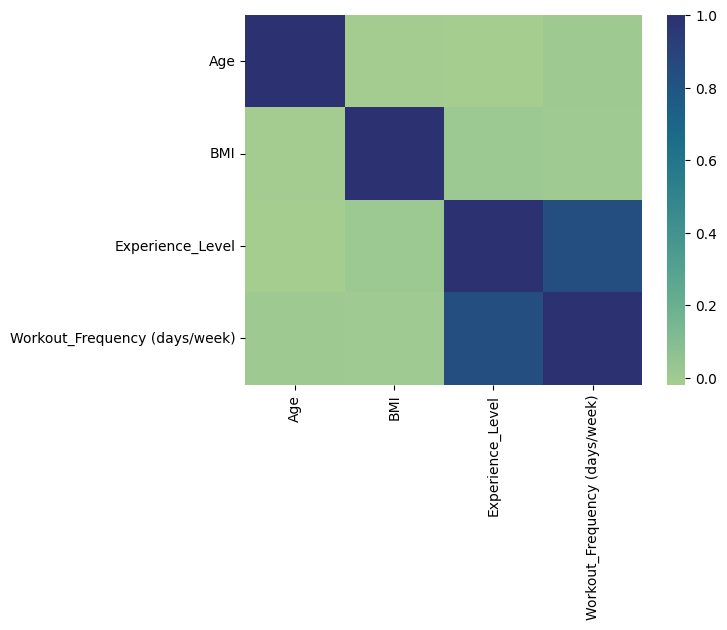

In [ ]:
corr = df[['Age','BMI', 'Experience_Level','Workout_Frequency (days/week)']].corr()

sns.heatmap(corr, cmap="crest")

Зависимость есть!

### BMI - индекс массы тела

In [ ]:
df['BMI'].value_counts(dropna=False)

,count
BMI,
23.53,5
23.88,4
22.48,4
26.47,4
21.16,4
...,...
14.88,1
15.07,1
14.36,1


Стратегии заполнения пропусков:

* если пропусков очень мало (~меньше процента) - строки с пропусками можно удалить

* если пропусков мало (~5-10%) - их можно заполнить (средним, медианой, уникальным значением, самым популярным значением, спрогнозировать)

* если пропусков много - можно удалить столбец

* можно пытаться предсказывать пропуски моделью

Посмотрим простую гистограмму по индексу массы тела

<ipython-input-39-24fbc48904e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Experience_Level', data = df, palette='bright')


<Axes: xlabel='Experience_Level', ylabel='count'>

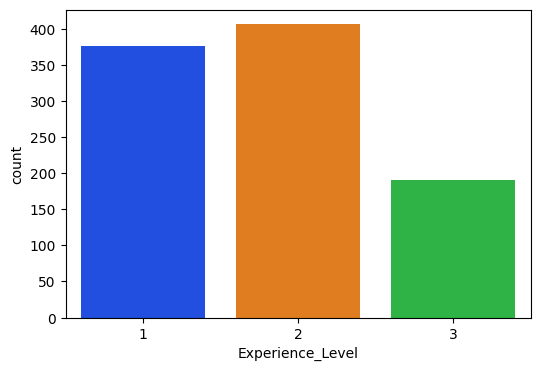

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Experience_Level', data = df, palette='bright')

Визуализируем связь среднего балла по математике в зависимости от пола. На гистограмме изображены для каждой категории:

* средний балл
* доверительный интервал для среднего с вероятностью 95%

<ipython-input-41-3e74ab5ede21>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Experience_Level', y='BMI', data = df, palette='summer')


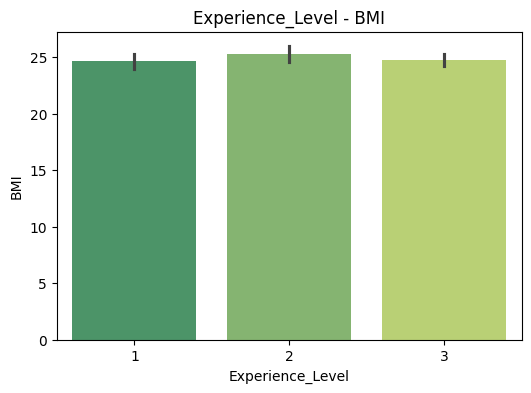

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='Experience_Level', y='BMI', data = df, palette='summer')
plt.title('Experience_Level - BMI')
plt.show()

Нарисуем errorbar, используя standard deviation (обычное стандартное отклонение)

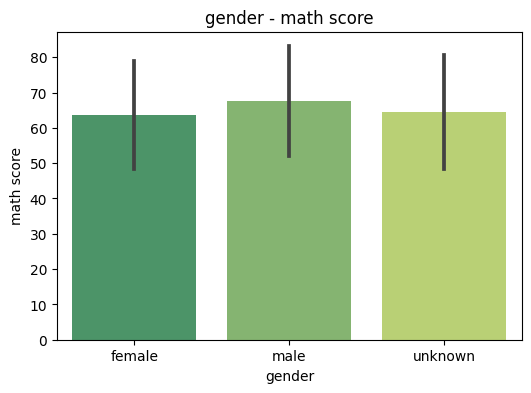

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='gender', y='math score', errorbar = "sd", data = df, palette='summer')
plt.title('gender - math score')
plt.show()

### Lunch - тип обеда

Посмотрим, как влияет тип обеда (lunch) на результаты студентов

In [ ]:
df['lunch'].value_counts()

standard        630
free/reduced    350
standart         20
Name: lunch, dtype: int64

Видим ошибочное написание категории 'standard'. Исправим ошибку.

In [ ]:
df['lunch'] = df['lunch'].replace('standart', 'standard')

In [ ]:
df['lunch'].value_counts()

standard        650
free/reduced    350
Name: lunch, dtype: int64

Посмотрим как влияет тип ланча на балл по математике

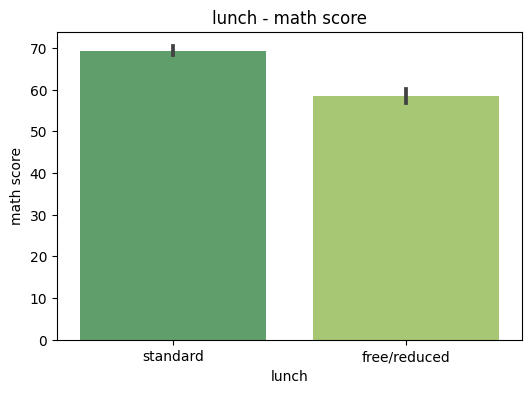

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='lunch', y='math score', data = df, palette='summer')
plt.title('lunch - math score')
plt.show()

Углубимся в разведочный анализ, и посмотрим как влияет связка факторов на балл:

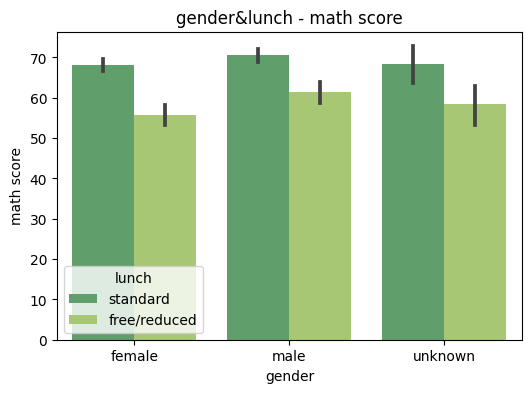

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='gender', y='math score', hue='lunch', data = df, palette='summer')
plt.title('gender&lunch - math score')
plt.show()

Ещё один полезный вид визуализации - ящик с усами.

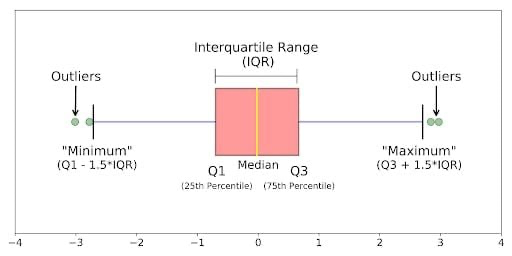

Посмотрим на ящик с усами, отображающий распределение балла по математике в зависимости от типа обеда (lunch).

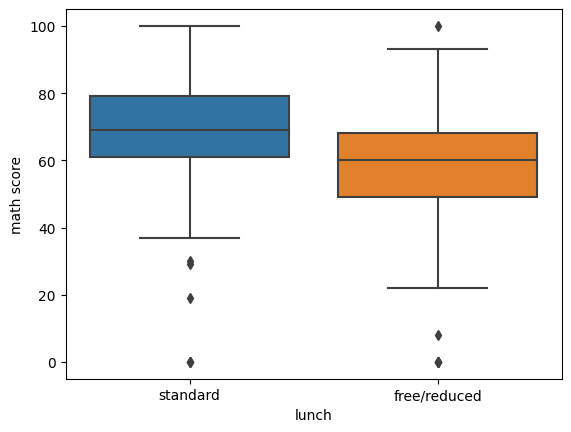

In [ ]:
sns.boxplot(x="lunch", y="math score", data=df)
plt.show()

## Бинаризация оценок

Будем считать, что студент сдал экзамен, если он набрал за него **не менее 50 баллов**.

In [ ]:
passmark = 25

Создадим столбцы `math success`, `reading success`, `writing success`, `overall success` где поставим:

* 1 - если индекс массы тела превышает норму
* 0 - если индекс массы тела не превышает норму

In [ ]:
df['BMI'] = df['BMI'].apply(lambda x: 1 if x >= passmark else 0)

In [ ]:
df[['math success', 'reading success', 'writing success', 'overall success']].sample(10)

,math success,reading success,writing success,overall success
802,1,1,1,True
627,1,0,0,False
486,1,0,1,False
417,1,1,1,True
53,1,1,1,True
431,1,1,1,True
156,1,1,1,True
468,1,1,1,True
564,0,1,0,False
864,1,1,1,True


In [ ]:
len(df[df['overall success'] == 0]) / len(df)

0.192

## Parental level of education - уровень образования родителей

In [ ]:
df['parental level of education'].value_counts()

associate's degree    212
some college          209
high school           180
some high school      159
bachelor's degree     109
master's degree        55
Name: parental level of education, dtype: int64

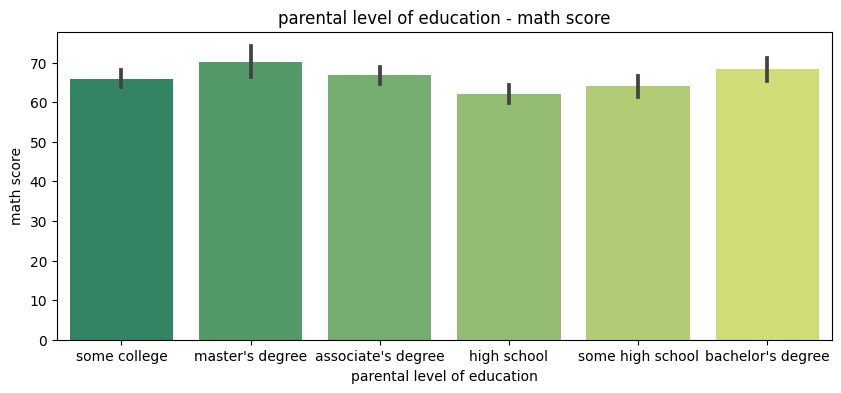

In [ ]:
plt.figure(figsize=(10,4))

sns.barplot(x='parental level of education', y='math score', data = df, palette='summer')
plt.title('parental level of education - math score')
plt.show()

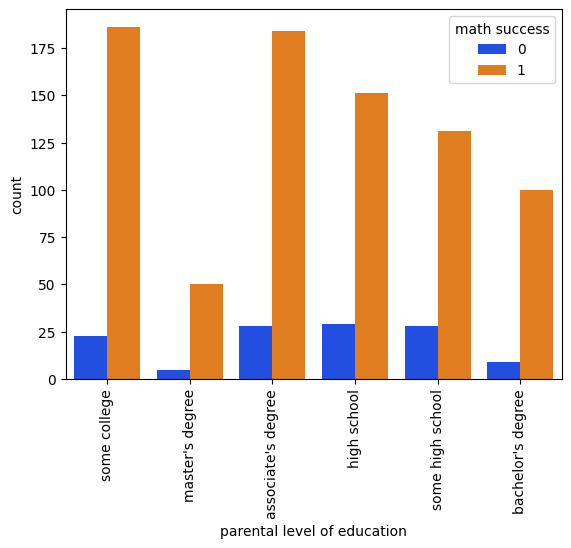

In [ ]:
p = sns.countplot(x='parental level of education', data = df, hue='math success', palette='bright')

_ = plt.setp(p.get_xticklabels(), rotation=90)

## Test preparation course - курсы для подготовки к экзаменам

In [ ]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

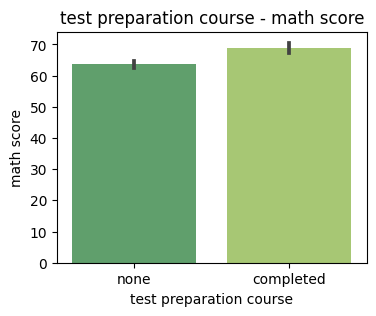

In [ ]:
plt.figure(figsize=(4,3))

sns.barplot(x='test preparation course', y='math score', data = df, palette='summer')
plt.title('test preparation course - math score')
plt.show()

<Axes: xlabel='test preparation course', ylabel='count'>

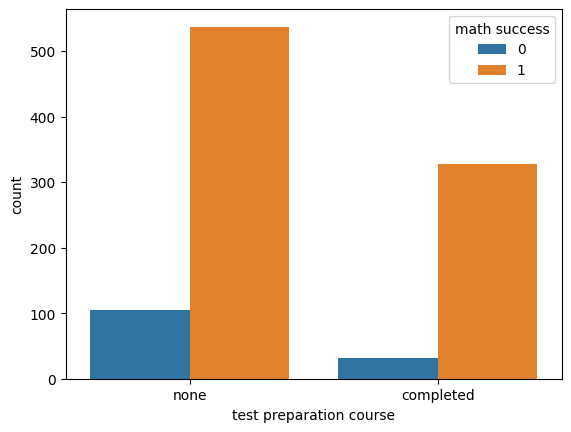

In [ ]:
sns.countplot(x='test preparation course', data = df, hue='math success')

# Машинное обучение

In [ ]:
df.head(1)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.2


## Предсказание успешной сдачи экзамена по `writing`

**Цель:** попробуем по характеристикам студентов предсказать, сдаст каждый из них экзамен по `writing` или нет.

Вопросы:

* *что такое матрица объект-признак? что такое целевая переменная?*

* *что такое тренировочные и тестовые данные? зачем разбивать все данные на тренировочные и тестовые?*

* *что в нашей задаче будет целевой переменной?*

* *что такое классификация и регрессия? какого типа наша задача?*

Схема машинного обучения:

* есть обучающие данные (с известными ответами) - на них модель учится находить зависимость ответов от признаков объектов

* есть тестовые данные (с неизвестными для модели ответами) - на них мы проверяем качество обученной модели

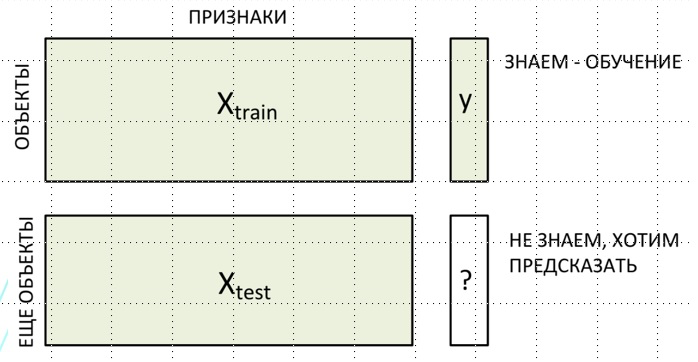

In [ ]:
X = df.drop(['Max_BPM','Avg_BPM','Resting_BPM','Water_Intake (liters)','Workout_Type','BMI'], axis=1)

y = df['BMI'] # целевая переменная (target)

In [ ]:
X.head()

,Age,Gender,Weight (kg),Height (m),Session_Duration (hours),Calories_Burned,Fat_Percentage,Workout_Frequency (days/week),Experience_Level
0,56,Male,88.3,1.71,1.69,1313.0,12.6,4,3
1,46,Female,74.9,1.53,1.30,883.0,33.9,4,2
2,32,Female,68.1,1.66,1.11,677.0,33.4,4,2
3,25,Male,53.2,1.70,0.59,532.0,28.8,3,1
4,38,Male,46.1,1.79,0.64,556.0,29.2,3,1


Чтобы применять классические модели машинного обучения, необходимо перевести категориальные (не являющиеся числами и не ведущие себя как числа) признаки в числовые.

Возьмем сейчас только бинарные признаки:
* `Gender`

Одну из категорий заменим на 1, другую на 0.

In [ ]:
X['Gender'] = X['Gender'].map({'Male' : 1, 'Female' : 0})

In [ ]:
X.head()

,Age,Gender,Weight (kg),Height (m),Session_Duration (hours),Calories_Burned,Fat_Percentage,Workout_Frequency (days/week),Experience_Level
0,56,1,88.3,1.71,1.69,1313.0,12.6,4,3
1,46,0,74.9,1.53,1.30,883.0,33.9,4,2
2,32,0,68.1,1.66,1.11,677.0,33.4,4,2
3,25,1,53.2,1.70,0.59,532.0,28.8,3,1
4,38,1,46.1,1.79,0.64,556.0,29.2,3,1


In [ ]:
y[:5]

,BMI
0,1
1,1
2,0
3,0
4,0


Разобъем данные на тренировочную и тестовую части

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((729, 9), (244, 9))

Для решения нашей задачи будем использовать линейный классификатор под названием **логистическая регрессия**.

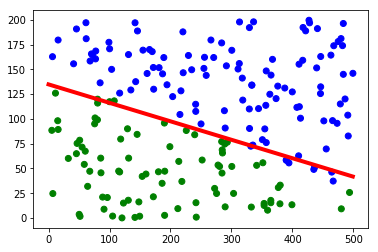

**Логистическая регрессия** - это линейный классификатор, прогноз которого является суммой признаков объектов с некоторыми коэффициентами (весами).

Когда модель предсказывает класс, она делает это по формуле
$$a(x) = sign(w_0 + w_1x_1 + w_2x_2 + ...),$$
то есть умножает признаки объекта $x_1,x_2,...$ на некоторые веса $w_0,w_1,w_2,...$

Например, если
* $x_1$ - `math score`
* $x_2$ - `lunch`,
то обученная модель может иметь вид
$$a(x) = sign(-12 + 1.2\cdot x_1 + 10\cdot x_2)$$

Веса модели подбираются автоматически так, чтобы модель как можно меньше ошибалась.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
pred[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
# y_test.value_counts(normalize=True)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[113,  15],
       [ 13, 103]])

вывод: В матрице нежелательной ошибкой является показатель 15 false positive, который при использовании модели даёт ложно положительный результат - человеку, у которого индекс массы тела не превышает норму, система выдаёт положительный результат. Положительный результат означает превышение нормы индекса массы тела

In [ ]:
# len(y_test[y_test == 0]), len(y_test[y_test == 1]), len(pred[pred == 0])

In [ ]:
model.coef_

array([[-1.05923453e-02, -3.38143290e+00,  2.08389831e-01,
        -3.96758932e+00,  1.95350325e-01, -1.50573829e-03,
        -1.03236062e-01, -6.14668375e-01,  1.39443649e-01]])

вывод по коэффицентам: показатель -6,14 является самым значимым среди всех. Это означает, что 8 колонка - Workout_Frequency (days/week) имеет самое сильное влияние на результат модели. Это означает, что индекс массы тела зависит от частоты посещения спортивного зала в неделю.

## Что дальше?

На следующем занятии:
* подробнее о том, что происходит при обучении логистической регрессии
* как интерпретировать результат/прогноз модели?
* как повлиять на прогнозы модели (выявить больше не сдавших экзамен)?
* как можно работать с категориальными признаками, у которых больше двух значений?

И начинаем двигаться в сторону сервиса! Обсудим Git и GitHub!

# Курсы сообщества AI Education

**Интенсивы**

---
[Разведочный анализ данных](https://stepik.org/a/177213)

На интенсиве вы познакомитесь с основными и продвинутыми подходами анализа данных:
  * Научитесь исследовать данные при помощи современных библиотек (NumPy, Pandas, Polars, Matplotlib, Seaborn)
  * Обучите свою первую модель машинного обучения
  * Построите интерактивный дашборд при помощи инструмента ExplainerDashboard
  * Начнете использовать такие инструменты разработчика как Git и Docker


[Линейные модели и их презентация](https://stepik.org/a/177215)  

В курсе вы не только разберете теоретическую сторону предмета, но и узнаете как использовать модели на практике:
  * Будете оценивать качество моделей регрессии и классификации
  * Проходить все этапы задачи ML: от разведочного анализа до получения прогноза и его интерпретации
  * Cтроить интерактивные дашборды при помощи библиотеки Streamlit
  * Cоздавать веб-сервисы с использованием фреймворка FastApi


В каждом интенсиве по 9 вебинаров (4 по анализу данных / 4 по разработке / финальный с подведением итогов и защитой проектов по желанию).

**Курсы**

---

[Практический Machine Learning](https://stepik.org/a/125501)

  * Курс посвящен изучению всех основных задач и подходов в машинном обучении. Курс дает как теорию методов, так и обширную практику.
  * За 16 недель курса вы пройдете путь практически с нуля в машинном обучении до уверенного владения основными алгоритмами и подходами.

[Прикладные задачи машинного обучения](https://stepik.org/a/175967)

* В курсе подробно разобраны следующие темы:

  * построение рекомендательных систем
  * анализ временных рядов
  * продвинутые методы интерпретации ML-моделей
  * AutoML

* Курс находится в процессе наполнения, в нем будут появляться новые актуальные и прикладные в ML-темы.